#ODS 5 - Desigualdade de genêro
Banco de dados sobre violência contra mulheres em Minas Gerais

Importando banco de dados

In [1]:
import os
import pandas as pd

# Caminho para o diretório contendo os arquivos CSV
directory_path = "/content/drive/MyDrive/Dados"

# Lista para armazenar os DataFrames de cada arquivo
all_dataframes = []

# Itera sobre os arquivos no diretório
for file_name in os.listdir(directory_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory_path, file_name)
        try:
            # Lê o arquivo CSV e adiciona à lista de DataFrames
            df = pd.read_csv(file_path, sep=';') # Ajuste o separador se necessário
            all_dataframes.append(df)
        except Exception as e:
            print(f"Erro ao ler o arquivo {file_name}: {e}")

# Concatena todos os DataFrames em um único DataFrame
if all_dataframes:
    dados_combinados = pd.concat(all_dataframes, ignore_index=True)
    print("DataFrames combinados com sucesso!")
    display(dados_combinados.head())
else:
    print("Nenhum arquivo CSV encontrado no diretório especificado.")

DataFrames combinados com sucesso!


,dt_notific,dt_nasc,nu_idade_n,cs_sexo,cs_raca,id_mn_resi,local_ocor,out_vezes,les_autop,viol_fisic,viol_psico,viol_sexu,num_envolv,autor_sexo,orient_sex,ident_gen
0,2010-08-03,1937-11-02,72,Feminino,Parda,Governador Valadares,Residencia,Sim,Não,Sim,Sim,Não,Um,Masculino,NaN,NaN
1,2010-02-07,1992-04-30,17,Feminino,Parda,Montes Claros,Residencia,Ignorado,Não,Sim,Sim,NaN,Um,Masculino,NaN,NaN
2,2010-06-28,2003-04-07,7,Feminino,Ignorado,Governador Valadares,Ignorado,Ignorado,Não,Não,Sim,Sim,Um,Masculino,NaN,NaN
3,2010-01-07,1963-05-07,46,Feminino,Parda,São José do Goiabal,Residencia,Ignorado,NaN,Não,Não,Não,Um,Feminino,NaN,NaN
4,2010-05-20,1917-08-01,92,Feminino,Branca,Jaboticatubas,Residencia,Sim,NaN,Não,Não,Não,Dois ou mais,Masculino,NaN,NaN


In [2]:
# Renomeando colunas
dados_combinados.rename(columns={'dt_notific': 'data_queixa','dt_nasc': 'data_nascimento','nu_idade_n': 'idade', 'id_mn_resi': 'municipio', 'out_vezes': 'recorrente', 'les_autop': 'lesao_autoaplicada'}, inplace=True)

In [5]:
# Tirando o ,0 das idades
# Mudando a ',' pra '.'
dados_combinados['idade'] = dados_combinados['idade'].astype(str).str.replace(',', '.')
# Tansformando idade em inteiro pra cobrir dados faltantes e tirar o '.0'
dados_combinados['idade'] = pd.to_numeric(dados_combinados['idade'], errors='coerce')
dados_combinados['idade'] = dados_combinados['idade'].astype('Int64')

display(dados_combinados.head())

,data_queixa,data_nascimento,idade,cs_sexo,cs_raca,municipio,local_ocor,recorrente,lesao_autoaplicada,viol_fisic,viol_psico,viol_sexu,num_envolv,autor_sexo,orient_sex,ident_gen
0,2010-08-03,1937-11-02,72,Feminino,Parda,Governador Valadares,Residencia,Sim,Não,Sim,Sim,Não,Um,Masculino,NaN,NaN
1,2010-02-07,1992-04-30,17,Feminino,Parda,Montes Claros,Residencia,Ignorado,Não,Sim,Sim,NaN,Um,Masculino,NaN,NaN
2,2010-06-28,2003-04-07,7,Feminino,Ignorado,Governador Valadares,Ignorado,Ignorado,Não,Não,Sim,Sim,Um,Masculino,NaN,NaN
3,2010-01-07,1963-05-07,46,Feminino,Parda,São José do Goiabal,Residencia,Ignorado,NaN,Não,Não,Não,Um,Feminino,NaN,NaN
4,2010-05-20,1917-08-01,92,Feminino,Branca,Jaboticatubas,Residencia,Sim,NaN,Não,Não,Não,Dois ou mais,Masculino,NaN,NaN


#Criando uma tabela especifica para analisar os tipos de violências

In [6]:
tipo_violencia = dados_combinados[['idade', 'viol_fisic', 'viol_psico', 'viol_sexu', 'autor_sexo']].copy()
situacao_socioeconomica = dados_combinados[['idade','cs_sexo','cs_raca','orient_sex','ident_gen']].copy()

In [7]:
dados_combinados.describe()

,idade
count,462723.0
mean,30.12208
std,15.993655
min,-1.0
25%,18.0
50%,28.0
75%,40.0
max,121.0


A idade média das vítimas é de 30 anos, tendo uma mediana de 28, evidenciando que mais da metade dos casos são contra jovens e o terceiro quartil sendo 40, um número não tão distante de 28, mostrando que casos com idosas foram raros no ano de 2025 em Minas Gerais. Porém é importante se atentar que o primeiro quartil é de 18 anos, então um quarto das vítimas são menores de idade, evidenciando a alta violência infantil.

In [8]:
situacao_socioeconomica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462758 entries, 0 to 462757
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idade       462723 non-null  Int64 
 1   cs_sexo     462758 non-null  object
 2   cs_raca     456806 non-null  object
 3   orient_sex  383893 non-null  object
 4   ident_gen   383893 non-null  object
dtypes: Int64(1), object(4)
memory usage: 18.1+ MB


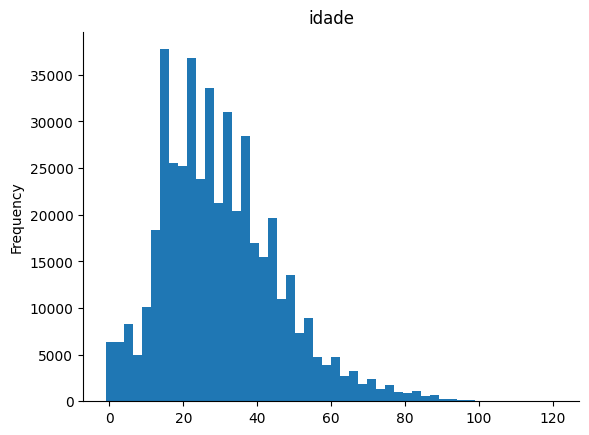

In [9]:
from matplotlib import pyplot as plt
situacao_socioeconomica['idade'].plot(kind='hist', bins=50, title='idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Analisando os dados não numéricos
Considerando frequência e frequência relativa dos dados.

In [10]:
parda = 0
branca = 0
indigena = 0
preta = 0
for raca in situacao_socioeconomica['cs_raca']:
  if raca == 'Parda':
    parda += 1
  elif raca == 'Branca':
    branca += 1
  elif raca == 'Indígena':
    indigena += 1
  elif raca == 'Preta':
    preta += 1
  else:
    continue
total = parda + branca + indigena + preta
porcentagem_parda = round((parda / total) * 100,2)
porcentagem_branca = round((branca / total) * 100,2)
porcentagem_indigena = round((indigena / total) * 100,2)
porcentagem_preta = round((preta / total) * 100,2)
print(f'Parda: {parda}, Porcentagem: {porcentagem_parda}%')
print(f'Branca: {branca}, Porcentagem: {porcentagem_branca}%')
print(f'Indígena: {indigena}, Porcentagem: {porcentagem_indigena}%')
print(f'Preta: {preta}, Porcentagem: {porcentagem_preta}%')
print(f'Total: {total}')
raca_data = {'Raça': ['Parda', 'Branca', 'Indígena', 'Preta'],
             'Contagem': [parda, branca, indigena, preta],
             'Porcentagem': [porcentagem_parda, porcentagem_branca, porcentagem_indigena, porcentagem_preta]}
raca_df = pd.DataFrame(raca_data)
display(raca_df)

Parda: 207975, Porcentagem: 49.77%
Branca: 156997, Porcentagem: 37.57%
Indígena: 1727, Porcentagem: 0.41%
Preta: 51212, Porcentagem: 12.25%
Total: 417911


,Raça,Contagem,Porcentagem
0,Parda,207975,49.77
1,Branca,156997,37.57
2,Indígena,1727,0.41
3,Preta,51212,12.25


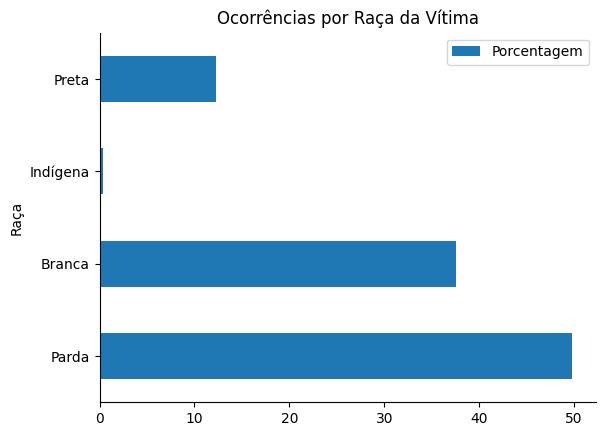

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
raca_df.plot(kind='barh', x='Raça', y='Porcentagem', title='Ocorrências por Raça da Vítima')
plt.gca().spines[['top', 'right',]].set_visible(False)

Com isso fica evidente que 62,43% das mulheres que sofrem dessas violências também são minorias raciais. Dois terços dos casos serem referentes à elas esta muito ligado ao racismo, que está incluso no ODS 10 da ONU.

In [13]:
feminino = 0
masculino = 0
outro = 0
for sexo in dados_combinados['autor_sexo']:
  if sexo == 'Feminino':
    feminino += 1
  elif sexo == 'Masculino':
    masculino += 1
  else:
    outro += 1

total = feminino + masculino + outro
genero_agressor_data = {'Genêro': ['Feminino', 'Masculino', 'Outro'],
             'Contagem': [feminino, masculino, outro],
             'Porcentagem': [round((feminino/total)*100,2), round((masculino/total)*100,2), round((outro/total)*100,2)]}
gen_agre_df = pd.DataFrame(genero_agressor_data)
display(gen_agre_df)
print(f'Feminino: {feminino}, Porcentagem: {round((feminino/total)*100,2)}')
print(f'Masculino: {masculino}, Porcentagem: {round((masculino/total)*100,2)}')
print(f'Outro: {outro}, Porcentagem: {round((outro/total)*100,2)}')

,Genêro,Contagem,Porcentagem
0,Feminino,168662,36.45
1,Masculino,237309,51.28
2,Outro,56787,12.27


Feminino: 168662, Porcentagem: 36.45
Masculino: 237309, Porcentagem: 51.28
Outro: 56787, Porcentagem: 12.27


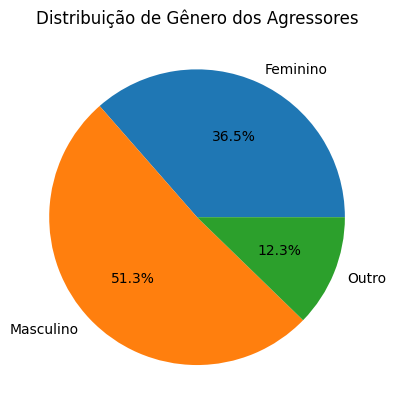

In [14]:
plt.pie(x=gen_agre_df['Porcentagem'], labels=gen_agre_df['Genêro'], autopct='%1.1f%%')
plt.title('Distribuição de Gênero dos Agressores')
plt.show()

A maioria dos agressores serem homens, infelizmente, não é um fato surpreendente pois é um fato conhecido que a cada 15 minutos uma mulher é espancada no Brasil.

In [16]:
sim = 0
nao = 0
for recorrente in dados_combinados['recorrente']:
  if recorrente == 'Sim':
    sim += 1
  elif recorrente == 'Não':
    nao += 1
  else:
    continue
total = sim + nao
recorrencia_agressao_data = {'Recorrente': ['Sim', 'Não'],
             'Contagem': [sim, nao],
             'Porcentagem': [round((sim/total)*100,2), round((nao/total)*100,2)]}
rec_agre_df = pd.DataFrame(recorrencia_agressao_data)
display(rec_agre_df)

print(f'Sim: {sim}, Porcentagem: {round((sim/total)*100,2)}%')
print(f'Não: {nao} Porcentagem: {round((nao/total)*100,2)}%')

,Recorrente,Contagem,Porcentagem
0,Sim,170686,47.92
1,Não,185509,52.08


Sim: 170686, Porcentagem: 47.92%
Não: 185509 Porcentagem: 52.08%


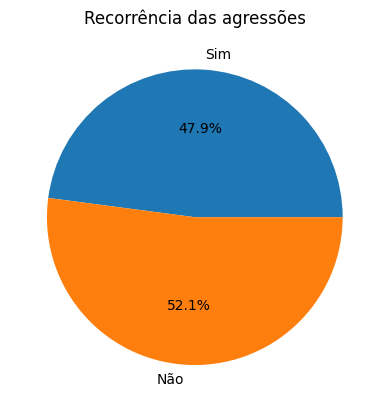

In [17]:
plt.pie(x=rec_agre_df['Porcentagem'], labels=rec_agre_df['Recorrente'], autopct='%1.1f%%')
plt.title('Recorrência das agressões')
plt.show()

Logo, é possível notar que pouco menos da metade dos casos são frequentes, evidenciando a dificuldade que muitas mulheres tem de fugir dessa situação.

In [18]:
recorrente_counts = dados_combinados['recorrente'].value_counts().reset_index()
recorrente_counts.columns = ['Recorrência', 'Contagem']
recorrente_counts['Porcentagem'] = round((recorrente_counts['Contagem'] / recorrente_counts['Contagem'].sum()) * 100, 2)
display(recorrente_counts)

autor_sexo_counts = dados_combinados['autor_sexo'].value_counts().reset_index()
autor_sexo_counts.columns = ['Sexo do Autor', 'Contagem']
autor_sexo_counts['Porcentagem'] = round((autor_sexo_counts['Contagem'] / autor_sexo_counts['Contagem'].sum()) * 100, 2)
display(autor_sexo_counts)

orient_sex_counts = dados_combinados['orient_sex'].value_counts().reset_index()
orient_sex_counts.columns = ['Orientação Sexual da Vítima', 'Contagem']
orient_sex_counts['Porcentagem'] = round((orient_sex_counts['Contagem'] / orient_sex_counts['Contagem'].sum()) * 100, 2)
display(orient_sex_counts)

,Recorrência,Contagem,Porcentagem
0,Não,185509,41.44
1,Sim,170686,38.13
2,Ignorado,91448,20.43


,Sexo do Autor,Contagem,Porcentagem
0,Masculino,237309,52.78
1,Feminino,168662,37.51
2,Ignorado,33730,7.50
3,Ambos os sexos,9905,2.20


,Orientação Sexual da Vítima,Contagem,Porcentagem
0,Heterossexual,222210,57.88
1,Ignorado,95395,24.85
2,Não se aplica,58420,15.22
3,Homossexual,6303,1.64
4,Bissexual,1565,0.41


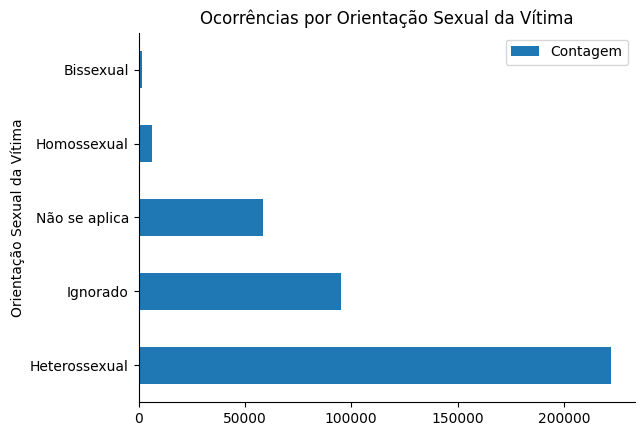

In [19]:
from matplotlib import pyplot as plt
orient_sex_counts.plot(kind='barh', x='Orientação Sexual da Vítima', y='Contagem', title='Ocorrências por Orientação Sexual da Vítima')
plt.gca().spines[['top', 'right',]].set_visible(False)

Com pouco mais da metade das vitimas tendo sido declaradas heterossexuais e aproximadamente 40% das vitimas não tendo declarado se mostra a baixa violência
**registrada** contra mulheres LGBTQIAPN+, com menos de 1000 casos declarados.